<a href="https://colab.research.google.com/github/anshudhanshu/Demand-Prediction-for-public-transport/blob/main/Sudhanshu_Rawat_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import datetime

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Copy of Nairobi Transport Data.zip (Unzipped Files)/train_revised.csv')
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


### **Understanding The data**

In [7]:
dataset.shape

(51645, 10)

There are 51645 observations in the dataset. And has 10 columns.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [9]:
dataset.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,PXMVEYGFYO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


### **Summary:-**

* There are total **61** unique  seats in this dataset

* travelers have used 2 types of payment method and most of the people have used **Mpesa** to pay for their ticket.

* The record of 149 days out of 2 year is present in this dataset.


* There are 2 different types of car and most of them are bus.


In [10]:
dataset.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

We don't see any null values in the dataset now.

so let us explore the dataset more.

In [11]:
len(dataset['ride_id'].unique())

6249

We see that there are 6249 unique `ride_id` in the dataset

### Finding Our Target Variable

Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way that is I will find the count of each `ride_id` and that will be the `number_of_ticket` as our target variable.

In [12]:
label=dataset.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


#### Now we found our target variable so let us delete the duplicate values from `ride_id` 

In [13]:
dataset=dataset.drop_duplicates("ride_id")

In [14]:
dataset.shape

(6249, 10)

Now let us merge two datasets on `ride_id` key to make the final dataset where we have dependent as well as independent variables too.

In [15]:

dataset = dataset.merge(label, how="left",on="ride_id")
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [16]:
dataset = dataset.drop(['seat_number','payment_method','payment_receipt'], axis=1)

### **Removing Constant Features**

We need to first remove the constant features. 

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
dataset.drop(["travel_to"],axis=1,inplace=True)


### **Feature Engineering**

In [19]:
#concatinate travel date and travel time column and make a new feature called date.
dataset["date"]=dataset["travel_date"]+ " "+dataset["travel_time"]


In [20]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute

  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )  # A lambda function that find if a day is weekend
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [21]:
dataset_new = time_features(dataset)

In [22]:
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [23]:
dataset_new["travel_time"] = dataset_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [24]:
dataset_new['period'] = np.nan

dataset_new.loc[dataset_new.travel_time < 7, 'period'] = 'em'
dataset_new.loc[(dataset_new.travel_time >= 7) & (dataset_new.travel_time < 11), 'period'] = 'am'
dataset_new.loc[(dataset_new.travel_time >= 11) & (dataset_new.travel_time < 15), 'period'] = 'mid'
dataset_new.loc[(dataset_new.travel_time >= 15) & (dataset_new.travel_time < 19), 'period'] = 'eve'
dataset_new.loc[(dataset_new.travel_time >= 19) & (dataset_new.travel_time <= 24), 'period'] = 'pm'


pcount = dict(dataset_new['period'].value_counts())
pcount


dataset_new['hourly_travelers'] = np.log1p(dataset_new['period'].map(pcount))



dcount = dict(dataset_new["day_of_year"].value_counts())
dataset_new["daily_travelers"] = np.log1p(dataset_new["day_of_year"].map(dcount))
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [25]:
dataset_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [26]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [27]:
transport_dataset=dataset_new.copy()

In [28]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [29]:
transport_dataset.shape

(6249, 21)

In [30]:
transport_dataset.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [31]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dataset['month'].replace(dict_cov,inplace=True)
  

In [32]:
transport_dataset.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [33]:
transport_dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [34]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [35]:
transport_dataset['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [36]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,2,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,2,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,3,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,3,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,3,201748,7,12,0,2017,4,2,am,8.494743,3.871201


In [37]:
# function to find the characterstics of the variable in the dataframe.
def data_characterization(df):
  '''This function takes dataframe as an argument and returns 
    the characterstics of the features of the dataframe'''
  characterized_df = pd.DataFrame(columns=['Columns name',	'Type', 'unique values Count', 'Count Nan values','Ratio Nan values','Unique values',	'Max',	'Min','Mean','std'])
  for col in df.columns:
    try:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()), 
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':df[col].max(),	'Min':df[col].min(),'Mean':df[col].mean(),'std':df[col].std()},
                                                ignore_index=True)
    except:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()), 
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':np.nan,	'Min':np.nan,'Mean':np.nan,'std':np.nan},
                                                ignore_index=True)
  return characterized_df

In [38]:
data_characterization(transport_dataset)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.0,"[1442, 5437, 5710, 5777, 5778, 5781, 5784, 578...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.0,"[17-10-17, 19-11-17, 26-11-17, 27-11-17, 20-04...",NaN,NaN,NaN,NaN
2,travel_time,float64,78,0,0.0,"[7.25, 7.2, 7.083333333333333, 7.1666666666666...",23.1667,5,8.239828,2.951814
3,travel_from,object,17,0,0.0,"[Migori, Keroka, Homa Bay, Kisii, Keumbu, Rong...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.0,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.0,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.0,"[1, 5, 31, 26, 2, 3, 11, 4, 9, 6, 8, 10, 24, 7...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.0,"[2017-10-17T07:15:00.000000000, 2017-11-19T07:...",NaN,NaN,NaN,NaN
8,day_of_week,int64,7,0,0.0,"[1, 6, 0, 4, 3, 2, 5]",6,0,2.913906,1.958013
9,day_of_year,int64,149,0,0.0,"[290, 323, 330, 331, 110, 109, 108, 107, 106, ...",365,1,158.033765,122.219956


**`Series.shift(periods=1, freq=None, axis=0, fill_value=None)`**


Shift index by desired number of periods with an optional time freq.

*When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime, or it will raise a NotImplementedError), the index will be increased using the periods and the freq. freq can be inferred when specified as “infer” as long as either freq or inferred_freq attribute is set in the index.*

**`Series-dt.total_seconds()` function:-**<br> 
<large> The `dt.total_seconds()` function is used to return total duration of each element expressed in seconds.</large>


In [41]:

# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["diff_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["diff_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["diff_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["diff_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["diff_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["diff_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["diff_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  fea=['diff_btw_0_1_next_bus', 'diff_btw_0_1_previous_bus', 'diff_btw_0_2_next_bus', 'diff_btw_0_2_previous_bus',
      'diff_btw_0_3_next_bus', 'diff_btw_0_3_previous_bus',
      'diff_btw_next_previous_bus']
  data[fea]=data.groupby(["travel_from"])[fea].fillna(method="ffill")
  data[fea]=data.groupby(["travel_from"])[fea].fillna(method="backfill")

  for i in [1,3,5,7,10,15] :
      data["count_trip_per_{}min_travel_from".format(str(i))]=data.groupby([pd.Grouper(key="date",freq='{}min'.format(i)),"travel_from"]).ride_id.transform("count")
      data["count_trip_per_{}min".format(str(i))]=data.groupby([pd.Grouper(key="date",freq='{}min'.format(i))]).ride_id.transform("count")

  return data

In [42]:
data = find_difference_bw_bus(transport_dataset)

In [43]:
data_characterization(data)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.00000,"[6654, 12926, 12929, 12935, 12924, 8627, 8628,...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.00000,"[05-12-17, 01-04-18, 13-01-18, 14-01-18, 15-01...",NaN,NaN,NaN,NaN
2,travel_time,float64,78,0,0.00000,"[7.133333333333334, 7.2, 7.216666666666667, 8....",23.1667,5,8.239828,2.951814
3,travel_from,object,17,0,0.00000,"[Awendo, Homa Bay, Kehancha, Kendu Bay, Keroka...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.00000,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.00000,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.00000,"[2, 20, 9, 15, 6, 1, 4, 5, 8, 12, 3, 17, 18, 1...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.00000,"[2017-05-12T07:08:00.000000000, 2018-01-04T07:...",NaN,NaN,NaN,NaN
8,day_of_week,int64,7,0,0.00000,"[4, 3, 5, 6, 0, 1, 2]",6,0,2.913906,1.958013
9,day_of_year,int64,149,0,0.00000,"[132, 4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...",365,1,158.033765,122.219956


We see that there are some null values present in the dataset so let us reomove those null values

In [44]:
data.dropna(inplace=True)


In [45]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,1,201719,7,8,0,2017,2,3,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,1,20181,7,8,0,2018,1,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,1,20181,7,12,0,2018,1,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,1,20181,7,13,0,2018,1,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,1,20181,8,0,0,2018,1,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2


In [46]:
from datetime import datetime
from datetime import timedelta

In [47]:

# The list of hollydays in Nirobi

# The  main goal of this chunk of the code is to find that there is holiday at perticular date or not

holidays_date=[datetime(2018,1,1),
              datetime(2018,3,30),
              datetime(2018,4,2),
              datetime(2018,6,1),
              datetime(2018,6,15),
              datetime(2017,10,20),
              datetime(2017,11,7),
              datetime(2017,12,12),
              datetime(2017,12,25),
              datetime(2017,12,26)]
                                      
holidays_date_mins_one_day=[ (day- timedelta(days=1)).date() for day in holidays_date]
holidays_date_mins_two_day=[ (day- timedelta(days=2)).date() for day in holidays_date]

holidays_date_plus_one_day=[ (day+ timedelta(days=1)).date() for day in holidays_date]
holidays_date=[ day.date() for day in holidays_date]

data["is_holidays"]=0
data["is_after_toomorw_holidays"]=0


data.loc[data.date.dt.date.isin(holidays_date),"is_holidays"]=1
data.loc[data.date.dt.date.isin(holidays_date_mins_two_day),"is_after_toomorw_holidays"]=1

In [48]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,1,201719,7,8,0,2017,2,3,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21,0,0
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,1,20181,7,8,0,2018,1,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20,0,0
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,1,20181,7,12,0,2018,1,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20,0,0
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,1,20181,7,13,0,2018,1,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20,0,0
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,1,20181,8,0,0,2018,1,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2,0,0


Now let us find the distance of each origin point from the distination point.
I used Nirobi Map to estimate the distance from origin point to destination map.




In [49]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [50]:

time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [51]:
data["Speed"]=data.travel_from_time/data.travel_from_distance

### **Encoding Categorical features**

In [52]:


time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

In [53]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)


In [54]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,hour,minute,is_weekend,year,quarter,period,hourly_travelers,daily_travelers,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,6654,05-12-17,7.133333,1,49,2,2017-05-12 07:08:00,4,132,201719,7,8,0,2017,2,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21,0,0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5530,12926,01-04-18,7.133333,1,49,20,2018-01-04 07:08:00,3,4,20181,7,8,0,2018,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20,0,0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5533,12929,01-04-18,7.200000,1,49,2,2018-01-04 07:12:00,3,4,20181,7,12,0,2018,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20,0,0,351.0,398,1.133903,13,50,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5539,12935,01-04-18,7.216667,1,49,9,2018-01-04 07:13:00,3,4,20181,7,13,0,2018,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20,0,0,351.0,398,1.133903,13,51,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5528,12924,01-04-18,8.000000,1,49,15,2018-01-04 08:00:00,3,4,20181,8,0,0,2018,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2,0,0,351.0,398,1.133903,14,38,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [59]:
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]


In [60]:
features = data.drop(not_used_cols,axis=1).columns

In [61]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'diff_btw_0_1_next_bus', 'diff_btw_0_1_previous_bus',
       'diff_btw_0_2_next_bus', 'diff_btw_0_2_previous_bus',
       'diff_btw_0_3_next_bus', 'diff_btw_0_3_previous_bus',
       'diff_btw_next_previous_bus', 'count_trip_per_1min_travel_from',
       'count_trip_per_1min', 'count_trip_per_3min_travel_from',
       'count_trip_per_3min', 'count_trip_per_5min_travel_from',
       'count_trip_per_5min', 'count_trip_per_7min_travel_from',
       'count_trip_per_7min', 'count_trip_per_10min_travel_from',
       'count_trip_per_10min', 'count_trip_per_15min_travel_from',
       'count_trip_per_15min', 'is_holidays', 'is_after_toomorw_holidays',
       'travel_from_distance', 'travel_from_time', 'Speed', 'hod_arrived_date',
       'minute_arrived_date', 'is_rush_hour', 'travel_from_Awendo',
       'travel_from_Homa Bay', 'travel_from_Keha

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [63]:
data[features]

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,diff_btw_0_1_next_bus,diff_btw_0_1_previous_bus,diff_btw_0_2_next_bus,diff_btw_0_2_previous_bus,diff_btw_0_3_next_bus,diff_btw_0_3_previous_bus,diff_btw_next_previous_bus,count_trip_per_1min_travel_from,count_trip_per_1min,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,1,3,1,7,1,11,1,12,1,16,1,21,0,0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,1,3,1,6,1,8,3,11,1,12,3,20,0,0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,1,2,2,7,2,8,3,11,2,8,3,20,0,0,351.0,398,1.133903,13,50,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,1,3,2,7,2,8,3,11,2,8,3,20,0,0,351.0,398,1.133903,13,51,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,1,2,1,2,1,2,1,2,1,2,1,2,0,0,351.0,398,1.133903,14,38,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,1,3,277,7,5,0,2018,4,8.494743,3.891820,-744.000000,720.000000,-760.083333,4015.916667,-1464.000000,4032.000000,1464.000000,1,3,1,9,1,11,1,12,1,18,1,28,0,0,399.0,450,1.127820,14,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
5875,1,6,308,7,5,1,2018,4,8.494743,3.970292,-16.083333,744.000000,-720.000000,1464.000000,-736.083333,4759.916667,760.083333,1,4,1,10,1,12,1,12,1,19,1,28,0,0,399.0,450,1.127820,14,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
5834,1,6,308,23,10,1,2018,4,5.659482,3.970292,-703.916667,16.083333,-720.000000,760.083333,-736.083333,1480.083333,720.000000,1,4,1,5,1,4,1,5,1,4,1,5,0,0,399.0,450,1.127820,6,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
5921,1,1,338,7,5,0,2018,4,8.494743,3.951244,-16.083333,703.916667,-720.000000,720.000000,-736.083333,1464.000000,720.000000,1,4,1,10,1,13,1,19,1,19,1,29,0,0,399.0,450,1.127820,14,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [64]:


# from sklearn.preprocessing import StandardScaler
# scaler =StandardScaler()







# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# scaler.fit(X_test)
# X_test = scaler.transform(X_test)

### **Training Gradient Boosting Regressor**

In [66]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)
  # Predicting 
  y_pred = reg.predict(X_test)
  #Find R-squared value
  r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print('Important features are: \n')
used_cols

Adjust_r2: 0.6117504735296367
Train score: 0.6859510149374021
Test score: 0.6170250910653816
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'hour',
 'minute',
 'hourly_travelers',
 'daily_travelers',
 'diff_btw_0_1_next_bus',
 'diff_btw_0_1_previous_bus',
 'diff_btw_0_2_next_bus',
 'diff_btw_0_2_previous_bus',
 'diff_btw_0_3_previous_bus',
 'diff_btw_next_previous_bus',
 'count_trip_per_1min_travel_from',
 'count_trip_per_3min_travel_from',
 'count_trip_per_5min_travel_from',
 'count_trip_per_10min_travel_from',
 'count_trip_per_10min',
 'count_trip_per_15min_travel_from',
 'travel_from_distance',
 'travel_from_time',
 'minute_arrived_date',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kisii',
 'travel_from_Rodi',
 'day_of_month_3',
 'month_2']

In [67]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error (MSE):  28.80547357987951
Mean Absolute Error (MAE):  3.5105716221892775
Root Mean Squared Error (MSE):  5.367073092466648


### **Training XGboost**

In [69]:
import xgboost as xgb
used_cols = [ 'diff_btw_0_1_next_bus','diff_btw_0_2_next_bus','diff_btw_0_2_previous_bus','count_trip_per_5min_travel_from',
             'hod_arrived_date','travel_from_distance','minute_arrived_date','Speed','travel_from_Sirare'
             ]
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ',r2)
print('Adjusted R2: ',adj_r2)



[05:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.770009538732552
Test score: 0.6647106101697698
Mean Squared Error (MSE):  25.163144744762214
Mean Absolute Error (MAE):  3.196584893171933
Root Mean Squared Error (MSE):  5.016287944761765
R2:  0.6647106101697698
Adjusted R2:  0.6632400426705145


In [70]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### **Decision Tree Regressor**

In [ ]:
# std_slc = StandardScaler()

# pca = decomposition.PCA()

# dec_tree = tree.DecisionTreeRegressor()

In [ ]:
# pipe = Pipeline(steps=[('std_slc', std_slc),
#                         ('pca', pca),
#                         ('dec_tree', dec_tree)],verbose=True)

In [ ]:
# n_components = list(range(1,X.shape[1]+1,1))
# max_depth = [2,4,6,8,10,12]
# cpp_alpha = [0.01,0.1,1,10,100]


In [ ]:
# parameters = dict(pca__n_components=n_components,
               
#                   dec_tree__max_depth=max_depth)

In [ ]:
# reg_GS = GridSearchCV(pipe, parameters)
# reg_GS.fit(X, y)

In [ ]:

# print('Best max_depth:', reg_GS.best_estimator_.get_params()['dec_tree__max_depth'])
# print('Best Number Of Components:', reg_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(reg_GS.best_estimator_.get_params()['dec_tree'])

### **Random Forest Regressor**

In [71]:

X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [72]:
dec_reg =RandomForestRegressor(random_state=0,max_depth=2)

In [73]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [76]:
print(dec_reg.score(X_train,y_train))
print(dec_reg.score(X_test,y_test))

0.42099770072676557
0.35801235237386486


In [77]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

### **Grid Search CV on XGboost**

In [78]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [81]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[05:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[05:57:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.6min finished


[05:58:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [82]:
# reg_GS1 = GridSearchCV(dec_reg, parameters,verbose=1)
# reg_GS1.fit(X, y)

In [83]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [84]:
reg_optimal_model =reg_gs.best_estimator_

In [85]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [86]:
reg_optimal_model.score(X_test,y_test)

0.8621490514213753

In [98]:
reg_optimal_model.score(X_train,y_train)

0.8668372333649956

In [87]:

#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [88]:

r2

0.8621490514213753

In [89]:
adj_r2

0.8581573614475559

In [90]:
importances = reg_optimal_model.feature_importances_

In [91]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [92]:
importance_df = pd.DataFrame(importance_dict)

In [93]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [94]:
imp_features = important_features['Feature'].tolist()

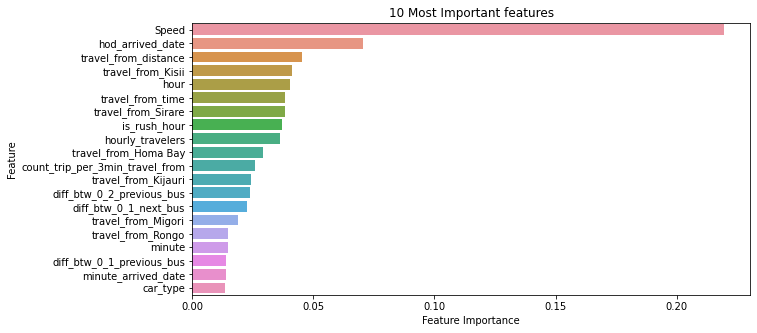

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

### **Evaluating Model**

In [96]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2)
print('Adjusted R2 Score: ',adj_r2)

Mean Squared Error (MSE):  10.345580497023997
Mean Absolute Error (MAE):  2.1377949590074796
Root Mean Squared Error (MSE):  3.216454647126864
R2 Score:  0.8621490514213753
Adjusted R2 Score:  0.8581573614475559
